In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# to get path
try:
    d=input('please enter the data link')
    d1=d.split('.')
    print(d1)
    d1=d1[-1]
    print(d1)
    if d1=='sql':
        df=pd.read_sql(d)
    elif d1=='csv':
        df=pd.read_csv(d)
    elif d1=='xsl':
        df=pd.read_excel(d)
    else :
        print('there is some thing wrong please try again')
except FileNotFoundError:
    print('file not found')

please enter the data linkC:\\Users\\LAPTOP\\Downloads\\final python master\\International_Report_Departures.csv
['C:\\\\Users\\\\LAPTOP\\\\Downloads\\\\final python master\\\\International_Report_Departures', 'csv']
csv


In [3]:
# to know the data
def know_the_data(df):
    print('The coulmns\n')
    print(df.columns)
    print('\n')
    print('the types of coulmns\n')
    print(df.dtypes)
    print('\n')
    print('the dimentions\n')
    print(df.shape)
    print('\n')
    print('The decripe of numerical data\n')
    print(df.describe())

In [4]:
know_the_data(df)

The coulmns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')


the types of coulmns

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object


the dimentions

(930808, 16)


The decripe of numerical data

                Year          Month     usg_apt_id        usg_wac  \
count  930808.000000  930808.000000  930808.000000  930808.000000   
mean     2006.021361       6.414783   12809.473781      42.511740   
std         8.558831       3.471070    2716.223845      27.571338   
min      1990.0000

In [5]:
# to remove the nulls
def remove_nulls(df):    
    for i in df.columns:
        if df[i].isna().sum()==0:
            print(str(i)+' has no null\n')
        elif df[i].isna().sum()< (len(df)/5):
            print(str(i)+' has a small null percentage we will drop it')
            df[i].dropna(inplace=True)
        else:
            print('the '+str(i)+ 'has a nun values')
            if df[i].dtypes=='object':
                print(str(i)+' has a nulls and will replaced')
                df.fillna(value=df[i].mode()[0], inplace=True)
            else :
                print(str(i)+' has a nulls and will replaced')
                df.fillna(value=df[i].mean(), inplace=True)

In [6]:
remove_nulls(df)

data_dte has no null

Year has no null

Month has no null

usg_apt_id has no null

usg_apt has no null

usg_wac has no null

fg_apt_id has no null

fg_apt has no null

fg_wac has no null

airlineid has no null

carrier has a small null percentage we will drop it
carriergroup has no null

type has no null

Scheduled has no null

Charter has no null

Total has no null



In [7]:
# to remove duplicates
def remove_duplicates(df):    
    if df.duplicated().sum()!=0:
        print('there is a duplicates we will remove it')
        df.drop_duplicates()
    else:
        print('no duplicates')

In [8]:
remove_duplicates(df)

no duplicates


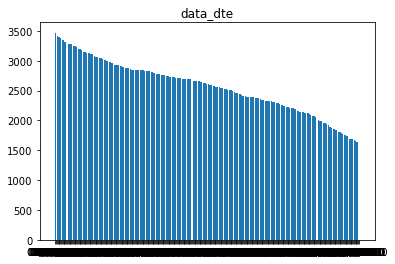

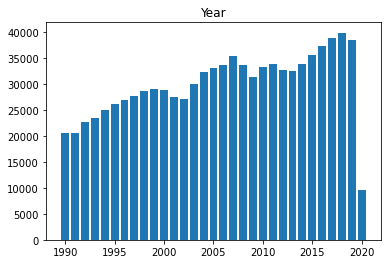

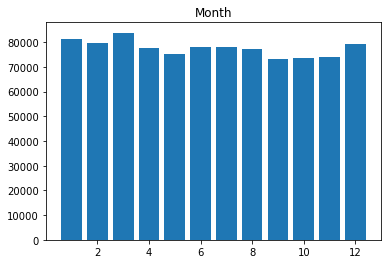

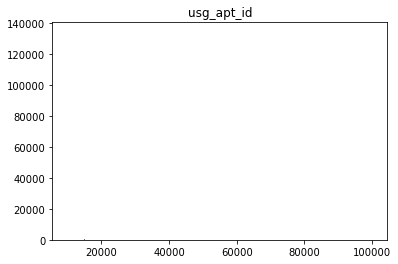

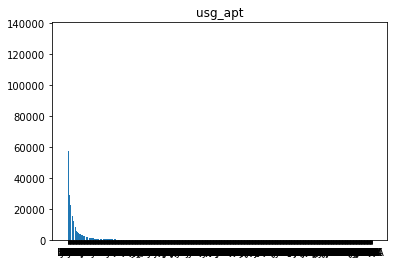

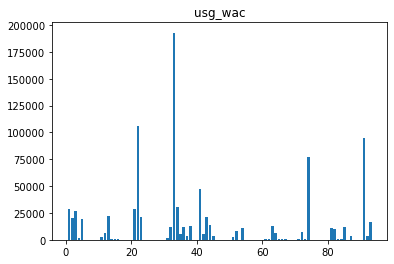

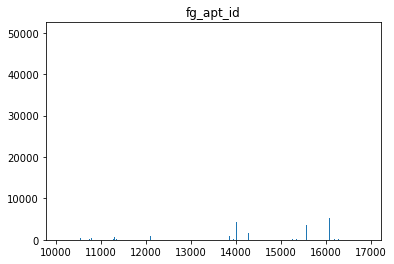

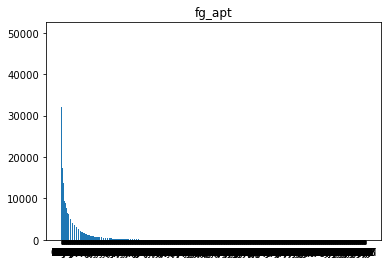

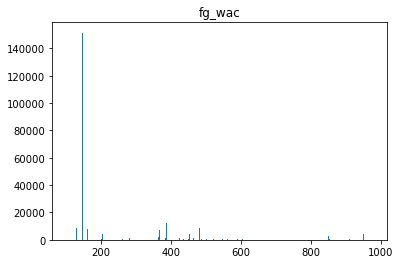

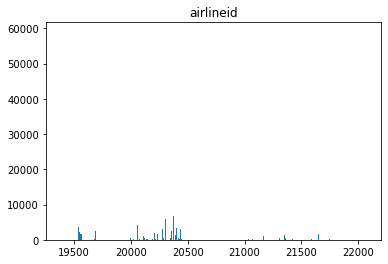

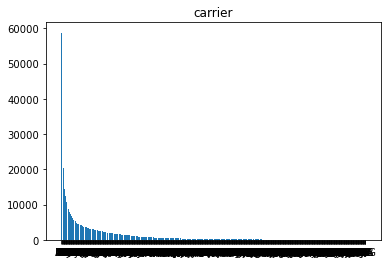

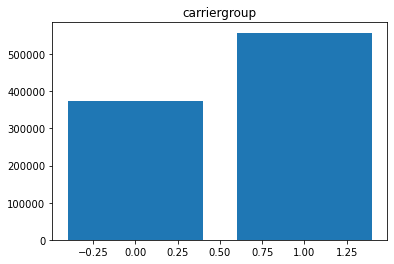

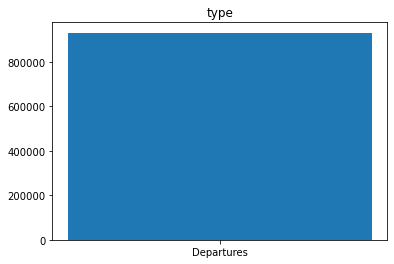

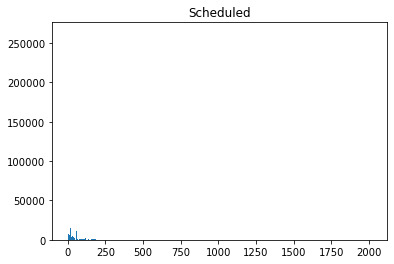

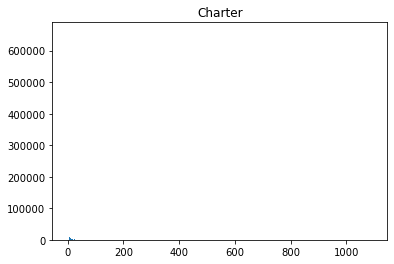

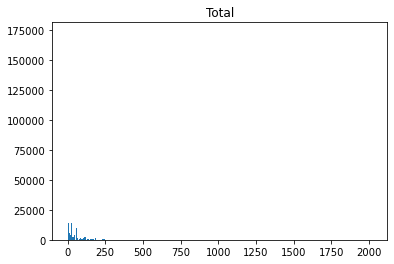

In [10]:
for i in df.columns:
        plt.figure()
        plt.bar(df[i].value_counts().index,df[[i]].value_counts().values)
        plt.title(str(i))
        plt.show()